In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
diamonds_train = pd.read_csv('outputs/df_train.csv')
diamonds_train_price = pd.read_csv('outputs/df_train_price.csv')
diamonds_predict=pd.read_csv('outputs/df_test.csv')

In [3]:
diamonds_train.head()

,carat,cut_numeric,color_numeric,clarity_numeric,depth,table,x,y,z
0,-1.051355,-0.810564,0.352161,-0.033632,0.736126,-0.650176,-1.283716,-1.236438,-1.180531
1,-0.966764,0.982588,0.940769,-0.641579,0.596363,-1.097476,-1.132102,-1.080061,-1.039596
2,-0.839879,-0.810564,1.529377,-0.641579,-1.010919,2.033618,-0.918059,-0.854183,-0.969129
3,-0.839879,0.086012,-0.825055,0.574315,0.037308,0.781181,-0.900222,-0.862870,-0.870475
4,0.217504,-0.810564,1.529377,-0.641579,-0.521746,2.480917,0.330526,0.344710,0.271096


In [4]:
diamonds_predict.head()

,carat,cut_numeric,color_numeric,clarity_numeric,depth,table,x,y,z
0,3.267015,0.978152,-1.416151,-1.232414,-0.666318,-1.554540,2.620734,2.539800,2.446736
1,2.596725,0.978152,-0.830504,-1.232414,0.168508,-0.658049,2.175567,2.234832,2.230593
2,-0.608098,0.978152,-1.416151,-0.627731,-0.040199,-1.554540,-0.495431,-0.491942,-0.492811
3,-1.047976,0.978152,-1.416151,-0.627731,-0.318474,-0.658049,-1.261117,-1.263332,-1.285335
4,0.334497,-2.592365,-0.830504,-0.023048,4.899190,-0.658049,0.332578,0.216660,0.890505


# Split train and test

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(diamonds_train, diamonds_train_price, test_size=0.01)

In [6]:
X_train.head()

,carat,cut_numeric,color_numeric,clarity_numeric,depth,table,x,y,z
18069,-0.987912,0.086012,0.940769,0.574315,-0.172337,0.691721,-1.132102,-1.140874,-1.138251
21310,0.238651,0.982588,0.940769,-0.641579,-0.242219,-1.544775,0.473222,0.440274,0.426124
6176,0.809638,0.982588,-1.413663,0.574315,0.316835,-0.202877,0.919145,0.857280,0.919396
20535,-0.205449,-1.707140,0.940769,-0.641579,0.666244,1.586319,-0.124315,-0.054921,-0.010773
13661,-0.628402,0.982588,-0.236447,-0.641579,-1.080800,-0.202877,-0.507809,-0.463239,-0.588605


In [7]:
y_test.shape

(405, 1)

# Hist Regressed

In [8]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor

In [9]:
reg = HistGradientBoostingRegressor(max_depth=8, min_samples_leaf=6)

In [10]:
reg.fit(X_train, y_train)

/home/must4in3/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


HistGradientBoostingRegressor(l2_regularization=0.0, learning_rate=0.1,
                              loss='least_squares', max_bins=255, max_depth=8,
                              max_iter=100, max_leaf_nodes=31,
                              min_samples_leaf=6, n_iter_no_change=None,
                              random_state=None, scoring=None, tol=1e-07,
                              validation_fraction=0.1, verbose=0,
                              warm_start=False)

In [11]:
y_pred_HGBR= reg.predict(X_test)

In [12]:
y_test_HGBR = y_test.copy()
y_test_HGBR['y']= y_pred_HGBR

In [13]:
y_test_HGBR['Price-y'] = abs(y_test_HGBR['price']- y_test_HGBR['y'])
y_test_HGBR.describe()

,price,y,Price-y
count,405.000000,405.000000,405.000000
mean,3982.883951,4006.344676,284.947129
std,4087.402616,4060.951095,449.149506
min,336.000000,456.084884,0.593126
25%,1016.000000,1003.184310,55.295397
50%,2407.000000,2468.038308,124.714287
75%,5499.000000,5359.541156,307.272590
max,17829.000000,17646.932433,3335.161936


In [ ]:
df_y = pd.DataFrame(y_pred_HGBR)

In [ ]:
df_y['id'] = df_y.index

In [ ]:
df_y['price'] = df_y[0]

In [ ]:
df_y = df_y[['id', 'price']]

In [ ]:
df_y

In [ ]:
df_y.to_csv('gaussian_rf300-huber-6-7-250-45_nooutlier.csv', index=False)

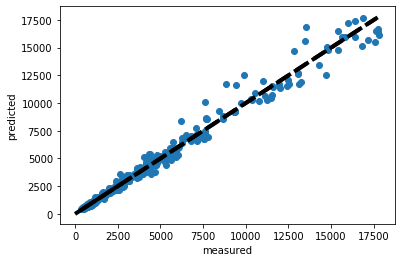

In [14]:
fig, ax = plt.subplots()
ax.scatter( y_test_HGBR['price'], y_test_HGBR['y'])
ax.plot([y_test_HGBR.min(), y_test_HGBR.max()], [y_test_HGBR.min(), y_test_HGBR.max()], 'k--', lw=4)
ax.set_xlabel('measured')
ax.set_ylabel('predicted')
plt.show()

In [15]:
from sklearn.metrics import mean_squared_error, r2_score
print(f'RMSE={mean_squared_error(y_pred_HGBR, y_test)**0.5}')

RMSE=531.4433490228398
